#  Empirical Study of Portfolio Construction and Risk Assessment
                                              By Vincent Tanoe,Ph.D.

In [2]:
!pip install --upgrade yfinance;

In [ ]:
import yfinance as yf
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*********

Run 1 - Returns Table:
+---+--------------------------------------------------------+--------------------+--------------------+--------------------+
|   |                         Stocks                         |   Monthly Return   |  Quarterly Return  |   Annual Return    |
+---+--------------------------------------------------------+--------------------+--------------------+--------------------+
| 0 |     HD, GOOGL, C, PFE, BAC, ABT, MSFT, VZ, V, PEP      | 1.010698586469213  |  3.03209575940764  | 12.12838303763056  |
| 1 |   WMT, AMZN, LLY, TSLA, DIS, PG, CSCO, T, CMCSA, XOM   | 2.2283423117488783 | 6.6850269352466345 | 26.740107740986538 |
| 2 | NFLX, INTC, JPM, PYPL, ROKU, JNJ, AAPL, NVDA, ADBE, MA | 4.2812540021590575 | 12.843762006477174 |  51.3750480259087  |
+---+--------------------------------------------------------+--------------------+--------------------+--------------------+
Run 1 - Risk Table:
+---+--------------------------------------------------------+-------------

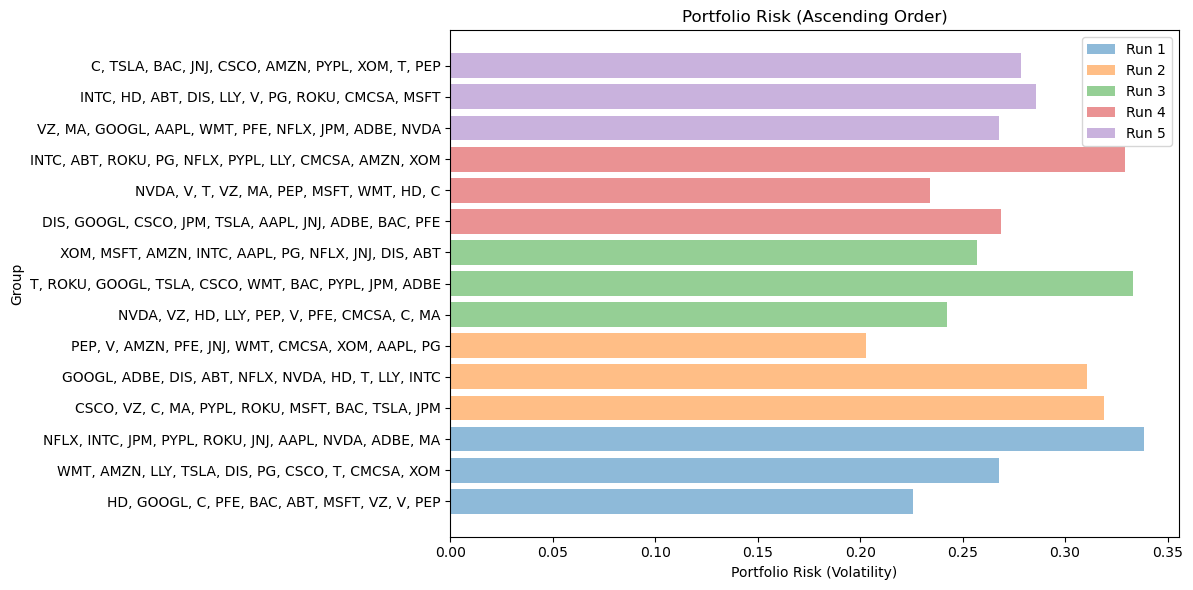

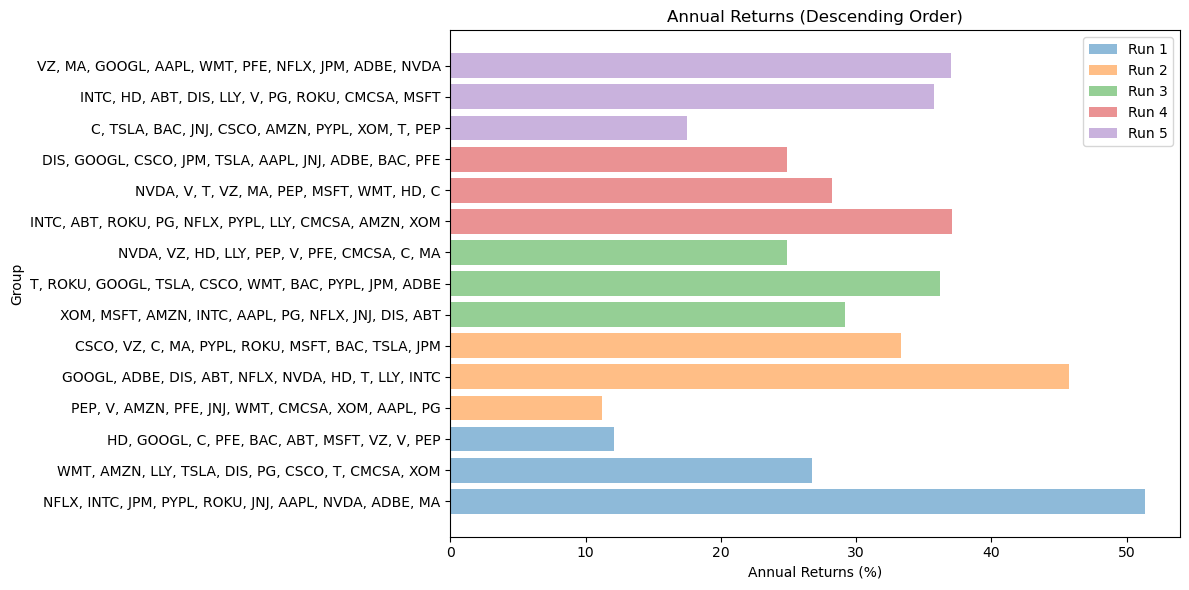

In [1]:
# Define a list of stock symbols (replace with your symbols)
stock_symbols = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "C", "TSLA", "ROKU", "JPM", "JNJ", "V",
    "WMT", "NVDA", "HD", "PYPL", "MA", "PG", "CMCSA", "BAC", "XOM", "DIS",
    "CSCO", "PEP", "INTC", "NFLX", "ADBE", "ABT", "T", "VZ", "PFE","LLY"
]

# Define the number of runs
num_runs = 5

# Create empty lists to store results
avg_monthly_returns = []
avg_quarterly_returns = []
avg_annual_returns = []
portfolio_risks = []
group_tables = []

# Loop through multiple runs
for run in range(1, num_runs + 1):
    # Shuffle the stock symbols randomly
    random.shuffle(stock_symbols)

    # Split the shuffled symbols into 3 groups of 10 each
    groups = [stock_symbols[i:i + 10] for i in range(0, len(stock_symbols), 10)]

    # Function to calculate average returns
    def calculate_average_returns(stock_symbols):
        group_returns = []
        for symbol in stock_symbols:
            stock_data = yf.download(symbol, start="2023-01-01", end="2024-01-01")
            monthly_return = stock_data['Adj Close'].pct_change().mean() * 21 * 100  # 21 trading days in a month
            quarterly_return = stock_data['Adj Close'].pct_change().mean() * 63 * 100  # 63 trading days in a quarter
            annual_return = stock_data['Adj Close'].pct_change().mean() * 252 * 100  # 252 trading days in a year
            group_returns.append((monthly_return, quarterly_return, annual_return))
        return group_returns

    # Function to calculate portfolio risk
    def calculate_portfolio_risk(stock_symbols):
        group_volatilities = []
        for symbol in stock_symbols:
            stock_data = yf.download(symbol, start="2023-01-01", end="2024-01-01")
            returns = stock_data['Adj Close'].pct_change()
            portfolio_volatility = returns.std() * (252 ** 0.5)
            group_volatilities.append(portfolio_volatility)
        return group_volatilities

    # Create lists to store results
    group_returns_list = []
    group_volatilities_list = []

    # Calculate returns and risk for each group
    for group_stocks in groups:
        group_returns = calculate_average_returns(group_stocks)
        group_volatilities = calculate_portfolio_risk(group_stocks)
        group_returns_list.append(group_returns)
        group_volatilities_list.append(group_volatilities)

    # Calculate average returns and portfolio risk for each group
    max_len = max(len(group_returns) for group_returns in group_returns_list)
    avg_monthly_return = [np.nanmean([returns[0] for returns in group_returns]) for group_returns in group_returns_list]
    avg_quarterly_return = [np.nanmean([returns[1] for returns in group_returns]) for group_returns in group_returns_list]
    avg_annual_return = [np.nanmean([returns[2] for returns in group_returns]) for group_returns in group_returns_list]
    portfolio_risk = [np.nanmean(group_volatilities) for group_volatilities in group_volatilities_list]

    # Append results to the respective lists
    avg_monthly_returns.append(avg_monthly_return)
    avg_quarterly_returns.append(avg_quarterly_return)
    avg_annual_returns.append(avg_annual_return)
    portfolio_risks.append(portfolio_risk)
    group_tables.append(groups)

# Create separate tables for returns and risk for each run
returns_tables = []
risk_tables = []
for i in range(num_runs):
    returns_table_dict = {
        "Stocks": [', '.join(groups) for groups in group_tables[i]],
        "Monthly Return": avg_monthly_returns[i],
        "Quarterly Return": avg_quarterly_returns[i],
        "Annual Return": avg_annual_returns[i],
    }
    risk_table_dict = {
        "Stocks": [', '.join(groups) for groups in group_tables[i]],
        "Portfolio Risk": portfolio_risks[i]
    }
    returns_tables.append(pd.DataFrame(returns_table_dict))
    risk_tables.append(pd.DataFrame(risk_table_dict))

# Create a combined table showing all stocks for each run
results_dict = {}
for i in range(num_runs):
    results_dict[f"Run {i + 1} - Stocks"] = [', '.join(groups) for groups in group_tables[i]]
    results_dict[f"Run {i + 1} - Monthly Return"] = avg_monthly_returns[i]
    results_dict[f"Run {i + 1} - Quarterly Return"] = avg_quarterly_returns[i]
    results_dict[f"Run {i + 1} - Annual Return"] = avg_annual_returns[i]
    results_dict[f"Run {i + 1} - Portfolio Risk"] = portfolio_risks[i]

results_table = pd.DataFrame(results_dict)

# Sort the results based on portfolio risk in ascending order
sorted_results_table = results_table.copy()
sorted_results_table = sorted_results_table.sort_values(by=[f"Run {i + 1} - Portfolio Risk" for i in range(num_runs)])

# Sort the annual returns based on descending order
annual_returns_table = results_table.copy()
annual_returns_table = annual_returns_table.sort_values(by=[f"Run {i + 1} - Annual Return" for i in range(num_runs)], ascending=False)

# Display the separate returns and risk tables
for i in range(num_runs):
    print(f"Run {i + 1} - Returns Table:")
    print(tabulate(returns_tables[i], headers='keys', tablefmt='pretty'))
    print(f"Run {i + 1} - Risk Table:")
    print(tabulate(risk_tables[i], headers='keys', tablefmt='pretty'))

# Display the sorted results table
print("Sorted Results Table:")
print(tabulate(sorted_results_table, headers='keys', tablefmt='pretty'))

# Display the sorted annual returns table
print("Annual Returns Table (Descending Order):")
print(tabulate(annual_returns_table, headers='keys', tablefmt='pretty'))

# Create a horizontal bar chart for sorted portfolio risk
plt.figure(figsize=(12, 6))
plt.barh(sorted_results_table["Run 1 - Stocks"], sorted_results_table["Run 1 - Portfolio Risk"], alpha=0.5, label='Run 1')
plt.barh(sorted_results_table["Run 2 - Stocks"], sorted_results_table["Run 2 - Portfolio Risk"], alpha=0.5, label='Run 2')
plt.barh(sorted_results_table["Run 3 - Stocks"], sorted_results_table["Run 3 - Portfolio Risk"], alpha=0.5, label='Run 3')
plt.barh(sorted_results_table["Run 4 - Stocks"], sorted_results_table["Run 4 - Portfolio Risk"], alpha=0.5, label='Run 4')
plt.barh(sorted_results_table["Run 5 - Stocks"], sorted_results_table["Run 5 - Portfolio Risk"], alpha=0.5, label='Run 5')
plt.title('Portfolio Risk (Ascending Order)')
plt.xlabel('Portfolio Risk (Volatility)')
plt.ylabel('Group')
plt.legend()
plt.tight_layout()
plt.show()

# Create a horizontal bar chart for sorted annual returns
plt.figure(figsize=(12, 6))
plt.barh(annual_returns_table["Run 1 - Stocks"], annual_returns_table["Run 1 - Annual Return"], alpha=0.5, label='Run 1')
plt.barh(annual_returns_table["Run 2 - Stocks"], annual_returns_table["Run 2 - Annual Return"], alpha=0.5, label='Run 2')
plt.barh(annual_returns_table["Run 3 - Stocks"], annual_returns_table["Run 3 - Annual Return"], alpha=0.5, label='Run 3')
plt.barh(annual_returns_table["Run 4 - Stocks"], annual_returns_table["Run 4 - Annual Return"], alpha=0.5, label='Run 4')
plt.barh(annual_returns_table["Run 5 - Stocks"], annual_returns_table["Run 5 - Annual Return"], alpha=0.5, label='Run 5')
plt.title('Annual Returns (Descending Order)')
plt.xlabel('Annual Returns (%)')
plt.ylabel('Group')
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
# Find the portfolio with the lowest risk
lowest_risk_portfolio = sorted_results_table.iloc[0]["Run 1 - Stocks"]

# Find the portfolio with the highest annual return
highest_return_portfolio = annual_returns_table.iloc[0]["Run 1 - Stocks"]

print(f"Portfolio with Lowest Risk: {lowest_risk_portfolio}")
print(f"Portfolio with Highest Annual Return: {highest_return_portfolio}")

Portfolio with Lowest Risk: HD, GOOGL, C, PFE, BAC, ABT, MSFT, VZ, V, PEP
Portfolio with Highest Annual Return: NFLX, INTC, JPM, PYPL, ROKU, JNJ, AAPL, NVDA, ADBE, MA


[*********************100%%**********************]  10 of 10 completed


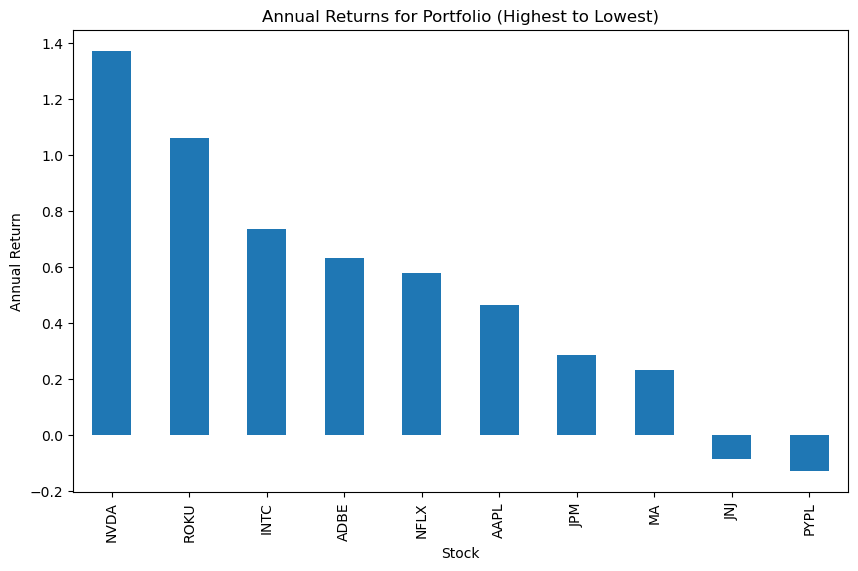

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the portfolio
portfolio = ["NFLX", "INTC", "JPM", "PYPL", "ROKU", "JNJ", "AAPL", "NVDA", "ADBE", "MA"]

# Fetch historical data for 2023
data = yf.download(portfolio, start="2023-01-01", end="2023-12-31")['Adj Close']

# Calculate annual returns
annual_returns = data.pct_change().mean() * 252  # Approximation using 252 trading days

# Sort the returns from highest to lowest
sorted_returns = annual_returns.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sorted_returns.plot(kind='bar')
plt.title('Annual Returns for Portfolio (Highest to Lowest)')
plt.ylabel('Annual Return')
plt.xlabel('Stock')
plt.show()

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Function to perform ARIMA on a given stock symbol
def perform_arima(stock_symbol):
    # Fetch historical data for 2023
    stock_data = yf.download(stock_symbol, start="2023-01-01", end="2023-12-31")
    
    # Calculate daily returns
    daily_returns = stock_data['Adj Close'].pct_change().dropna()
    
    # Fit ARIMA model (using example parameters (1,1,1))
    model = ARIMA(daily_returns, order=(1,1,1))
    model_fit = model.fit()
    
    # Print the summary
    print(f"ARIMA Model Summary for {stock_symbol}:")
    print(model_fit.summary())
    
    # Forecasting the next 5 days (optional)
    forecast = model_fit.forecast(steps=5)
    print(f"\nForecast for {stock_symbol}:")
    print(forecast)

# Assuming sorted_returns is available from the previous step
top_3_stocks = sorted_returns.index[:3]

# Perform ARIMA analysis on each of the top 3 stocks
for stock in top_3_stocks:
    perform_arima(stock)
    print("\n" + "="*50 + "\n")

[*********************100%%**********************]  1 of 1 completed
/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: 

ARIMA Model Summary for NVDA:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 511.234
Date:                Mon, 19 Feb 2024   AIC                          -1016.469
Time:                        18:23:05   BIC                          -1005.929
Sample:                             0   HQIC                         -1012.226
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0132      0.082      0.161      0.872      -0.148       0.175
ma.L1         -0.9850      0.019    -51.185      0.000      -1.023      -0.947
sigma2         0.0009 


/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary for INTC:
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 569.504
Date:                Mon, 19 Feb 2024   AIC                          -1133.007
Time:                        18:23:05   BIC                          -1122.467
Sample:                             0   HQIC                         -1128.764
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1224      0.068      1.795      0.073      -0.011       0.256
ma.L1         -0.9995      0.487     -2.053      0.040      -1.954      -0.045
sigma2         0.0006 

/Users/vincenttanoe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
